In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('house_price.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [4]:
(df == 0).sum().sort_values(ascending=False)/len(df)

PoolArea         0.995205
3SsnPorch        0.983562
LowQualFinSF     0.982192
MiscVal          0.964384
BsmtHalfBath     0.943836
ScreenPorch      0.920548
BsmtFinSF2       0.885616
EnclosedPorch    0.857534
HalfBath         0.625342
MasVnrArea       0.589726
BsmtFullBath     0.586301
2ndFlrSF         0.567808
WoodDeckSF       0.521233
Fireplaces       0.472603
OpenPorchSF      0.449315
BsmtFinSF1       0.319863
BsmtUnfSF        0.080822
GarageArea       0.055479
GarageCars       0.055479
TotalBsmtSF      0.025342
FullBath         0.006164
BedroomAbvGr     0.004110
KitchenAbvGr     0.000685
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
GrLivArea        0.000000
Id               0.000000
FireplaceQu      0.000000
GarageType       0.000000
GarageYrBlt      0.000000
1stFlrSF         0.000000
GarageQual       0.000000
GarageCond       0.000000
PavedDrive       0.000000
PoolQC           0.000000
Fence            0.000000
MiscFeature      0.000000
MoSold      

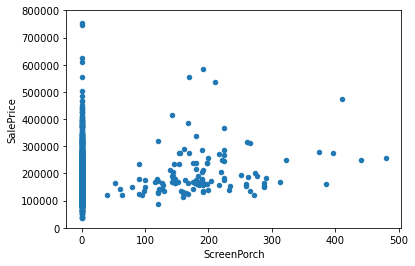

In [5]:
var = 'ScreenPorch'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [6]:
px.scatter(df, x='ScreenPorch', y='SalePrice', trendline='ols')

In [12]:
zero = ["EnclosedPorch","ScreenPorch","MasVnrArea","WoodDeckSF","2ndFlrSF","HalfBath","BedroomAbvGr","Fireplaces"]
for i in zero:
    fig = sns.scatter(df, x=i, y='SalePrice', trendline='ols')
    fig.show()

AttributeError: module 'seaborn' has no attribute 'scatter'

In [9]:
zero2 = ["PoolArea","3SsnPorch","LowQualFinSF","MiscVal","BsmtHalfBath","BsmtFinSF2"]
for i in zero2:
    fig = px.scatter(df, x=i, y='SalePrice', trendline='ols')
    fig.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

<AxesSubplot:>

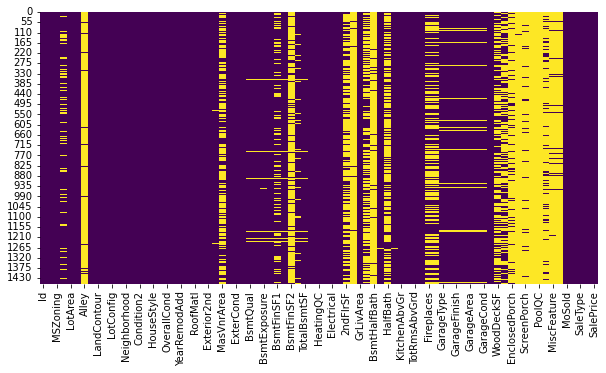

In [11]:
#create heatmap for null and zero values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull() | df.isin([0]), cbar=False, cmap='viridis')

In [12]:
#corr 
corr = df.corr()
corr["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [13]:
corr = df.corr()
corr['SalePrice'].sort_values(ascending=False)
korelasyon = ["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd"]

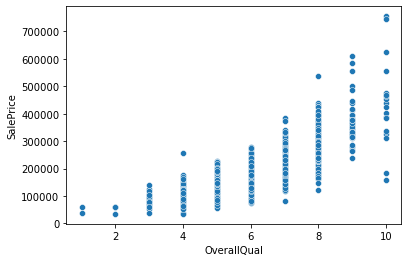

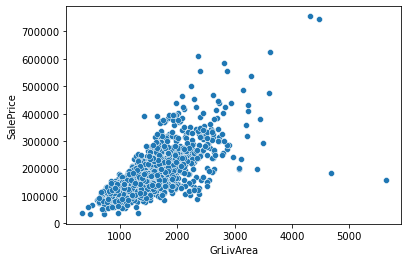

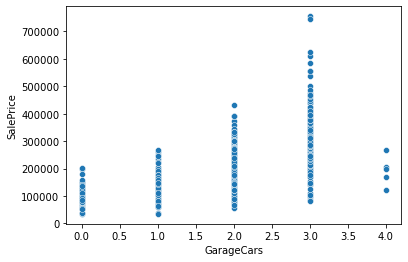

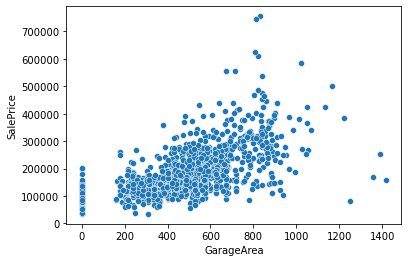

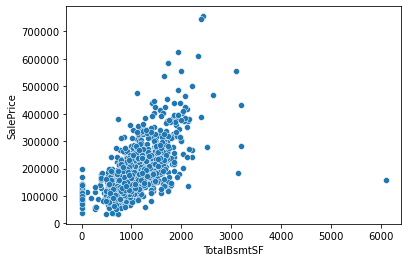

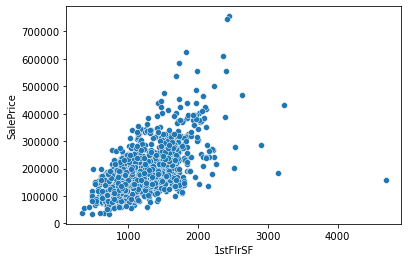

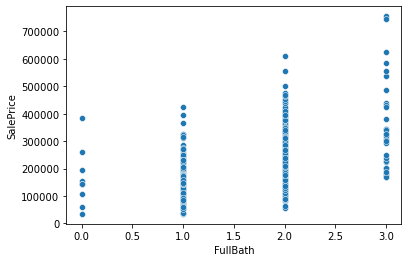

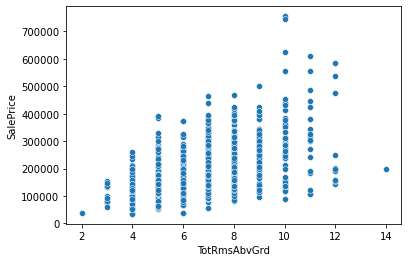

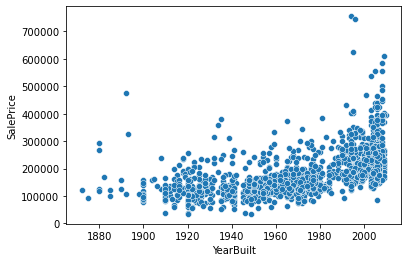

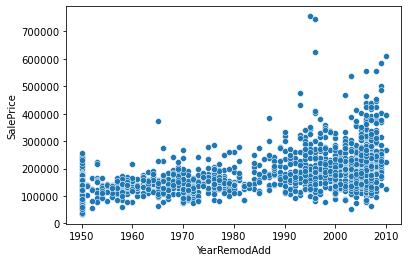

In [14]:
for i in korelasyon:
    sns.scatterplot(x=df[i], y=df["SalePrice"])
    plt.show()

In [15]:
corr = df.corr()
for i in korelasyon:
    print("+++++++++"+i.upper()+"+++++++++")
    print(corr[i].sort_values(ascending=False))
    print("----------------")

+++++++++OVERALLQUAL+++++++++
OverallQual      1.000000
SalePrice        0.790982
GarageCars       0.600671
GrLivArea        0.593007
YearBuilt        0.572323
GarageArea       0.562022
YearRemodAdd     0.550684
FullBath         0.550600
GarageYrBlt      0.547766
TotalBsmtSF      0.537808
1stFlrSF         0.476224
TotRmsAbvGrd     0.427452
MasVnrArea       0.411876
Fireplaces       0.396765
OpenPorchSF      0.308819
BsmtUnfSF        0.308159
2ndFlrSF         0.295493
HalfBath         0.273458
LotFrontage      0.251646
BsmtFinSF1       0.239666
WoodDeckSF       0.238923
BsmtFullBath     0.111098
LotArea          0.105806
BedroomAbvGr     0.101676
MoSold           0.070815
PoolArea         0.065166
ScreenPorch      0.064886
MSSubClass       0.032628
3SsnPorch        0.030371
YrSold          -0.027347
Id              -0.028365
LowQualFinSF    -0.030429
MiscVal         -0.031406
BsmtHalfBath    -0.040150
BsmtFinSF2      -0.059119
OverallCond     -0.091932
EnclosedPorch   -0.113937
KitchenA

In [16]:
#show heaatpam of null values in px
px.imshow(df.isnull(), labels=dict(x="Columns", y="Rows", color="Null Values"))

In [17]:
#show null values in percentage descending order
df.isnull().sum().sort_values(ascending=False)/len(df)*100

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [18]:
df.isnull().sum()[df.isnull().sum()/len(df)*100 > 40]

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [19]:
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [20]:
px.imshow(df.isnull(), labels=dict(x="Columns", y="Rows", color="Null Values"))

In [21]:
#show percentage of null values in lotfrontage
df['LotFrontage'].isnull().sum()/len(df)*100

17.73972602739726

In [22]:
#if categorical then fill with mode and if numerical then fill with mean
for col in df.columns:
    if df[col].dtype == 'O':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

In [23]:
#sum every null values
df.isnull().sum().sum()

0

In [24]:
#import pandas_profiling 
#profile = df.profile_report(title='House Price EDA Report')
#profile.to_file(output_file="house_price_eda.html")

In [25]:
#profile

In [26]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0          Gd     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

<AxesSubplot:>

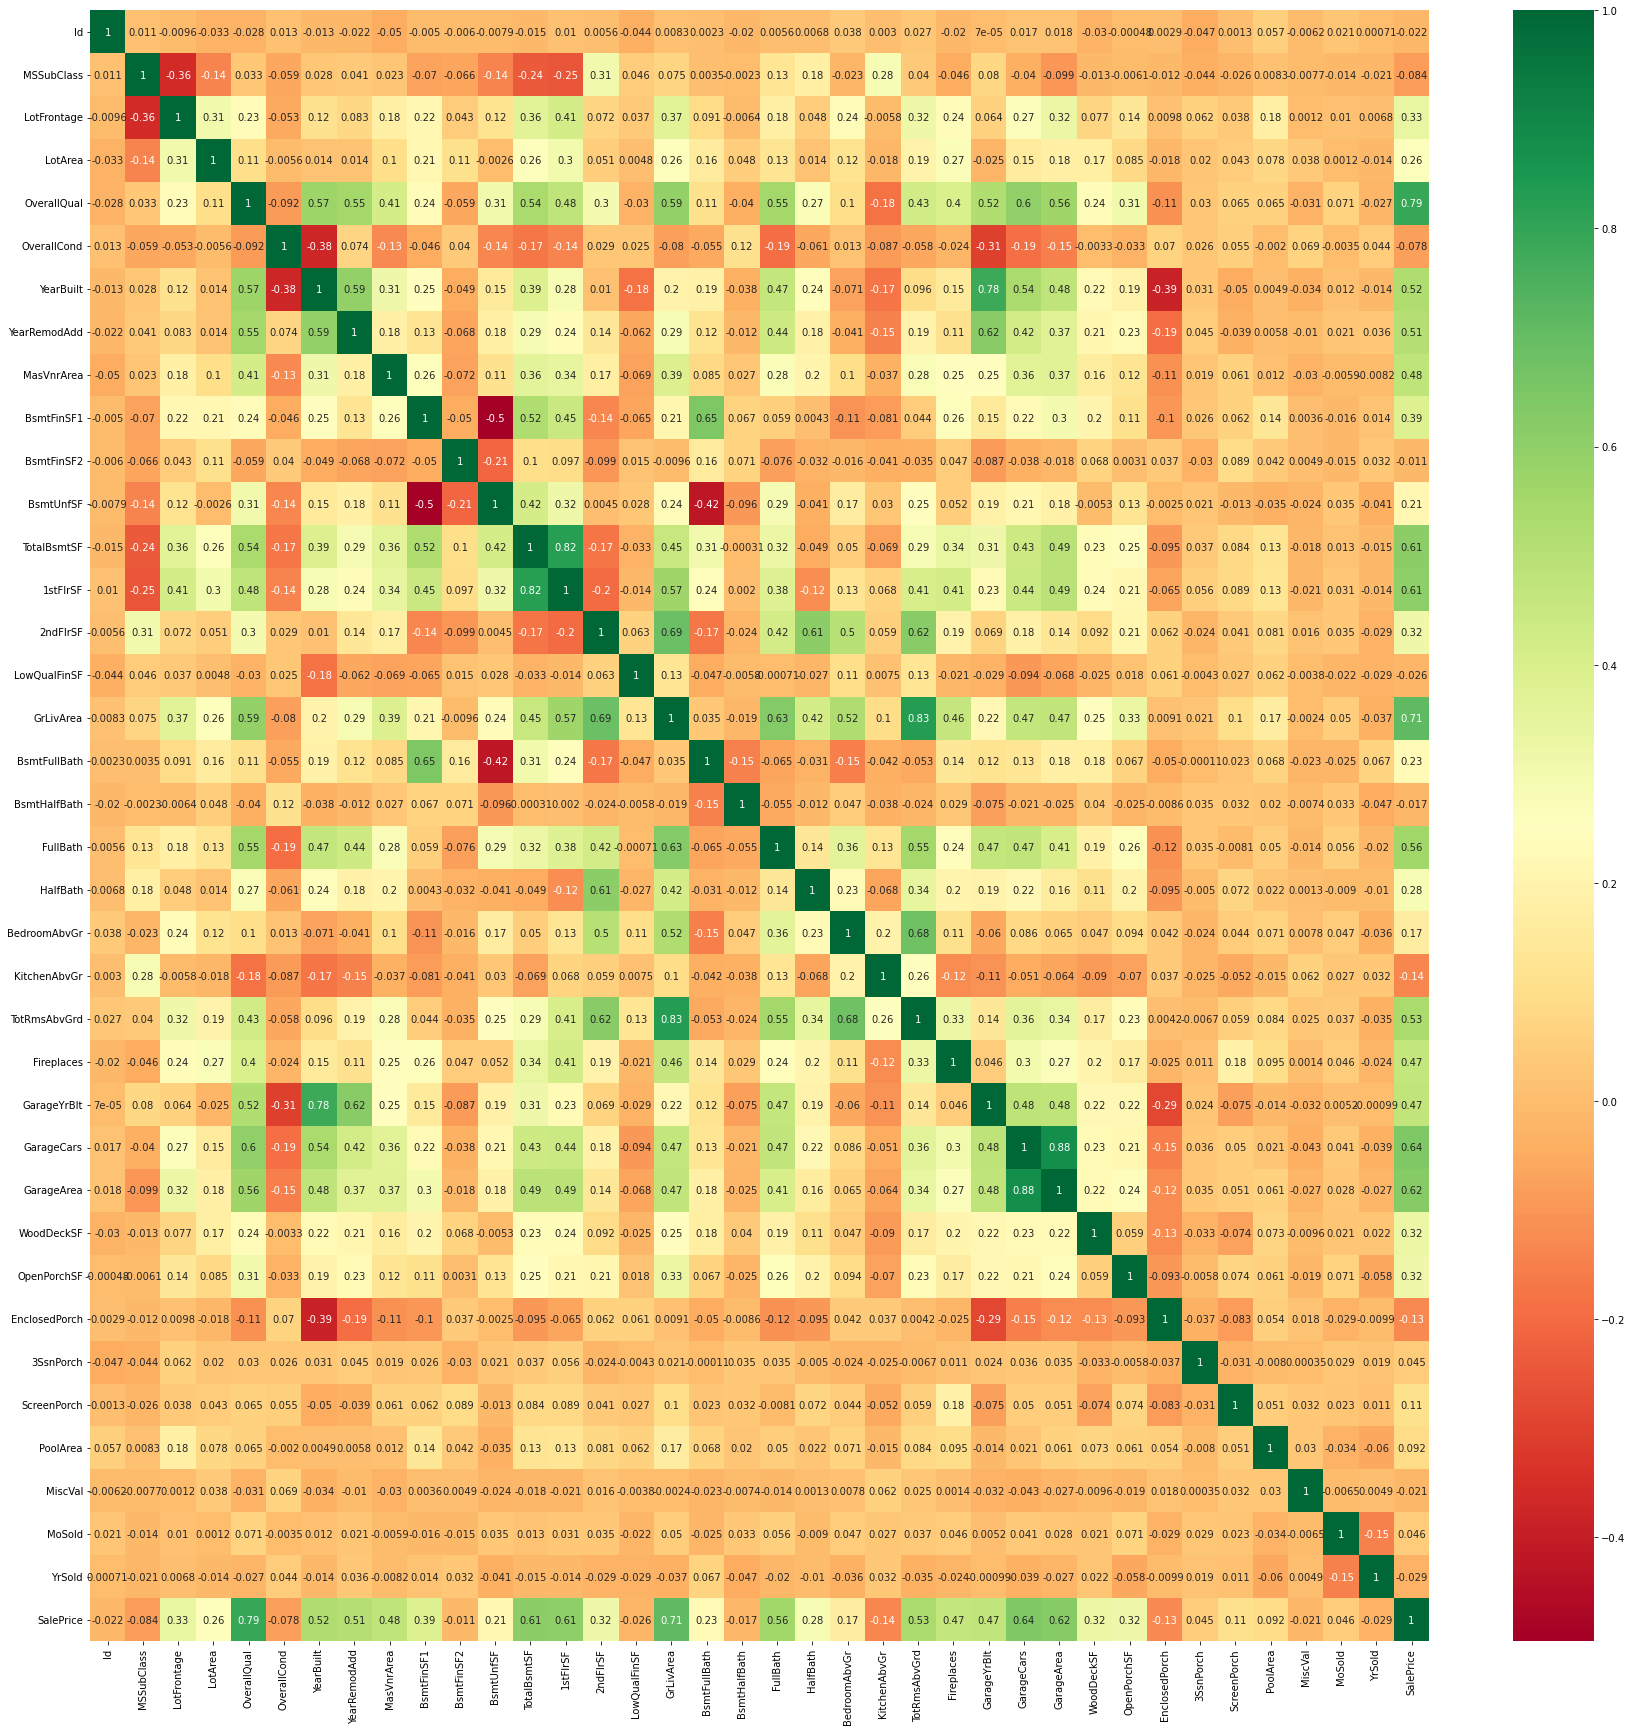

In [27]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap='RdYlGn')

In [28]:
#show the correlation of every columns with saleprice
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [29]:
#show percentage of zero values in every columns and ascending
(df == 0).sum().sort_values(ascending=False)/len(df)*100

PoolArea         99.520548
3SsnPorch        98.356164
LowQualFinSF     98.219178
MiscVal          96.438356
BsmtHalfBath     94.383562
ScreenPorch      92.054795
BsmtFinSF2       88.561644
EnclosedPorch    85.753425
HalfBath         62.534247
MasVnrArea       58.972603
BsmtFullBath     58.630137
2ndFlrSF         56.780822
WoodDeckSF       52.123288
Fireplaces       47.260274
OpenPorchSF      44.931507
BsmtFinSF1       31.986301
BsmtUnfSF         8.082192
GarageArea        5.547945
GarageCars        5.547945
TotalBsmtSF       2.534247
FullBath          0.616438
BedroomAbvGr      0.410959
KitchenAbvGr      0.068493
KitchenQual       0.000000
GrLivArea         0.000000
Id                0.000000
GarageType        0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
FireplaceQu       0.000000
Electrical        0.000000
GarageYrBlt       0.000000
GarageFinish      0.000000
GarageQual        0.000000
GarageCond        0.000000
PavedDrive        0.000000
MoSold            0.000000
Y

In [30]:
#show ploty box for every columns
for col in df.columns:
    if df[col].dtype == 'O':
        fig = px.box(df, x=col, y='SalePrice')
        fig.show()

In [33]:
#show percatge of outliers in every columns
for col in df.columns:
    if df[col].dtype != 'O':
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        outlier = df[(df[col] < lower) | (df[col] > upper)].count()[0]
        print(col, ":", outlier/len(df)*100)

Id : 0.0
MSSubClass : 7.054794520547945
LotFrontage : 7.260273972602739
LotArea : 4.726027397260274
OverallQual : 0.136986301369863
OverallCond : 8.561643835616438
YearBuilt : 0.4794520547945206
YearRemodAdd : 0.0
MasVnrArea : 6.712328767123288
BsmtFinSF1 : 0.4794520547945206
BsmtFinSF2 : 11.438356164383562
BsmtUnfSF : 1.9863013698630139
TotalBsmtSF : 4.178082191780822
1stFlrSF : 1.36986301369863
2ndFlrSF : 0.136986301369863
LowQualFinSF : 1.7808219178082192
GrLivArea : 2.1232876712328768
BsmtFullBath : 0.0684931506849315
BsmtHalfBath : 5.616438356164384
FullBath : 0.0
HalfBath : 0.0
BedroomAbvGr : 2.3972602739726026
KitchenAbvGr : 4.657534246575342
TotRmsAbvGrd : 2.054794520547945
Fireplaces : 0.3424657534246575
GarageYrBlt : 0.0684931506849315
GarageCars : 0.3424657534246575
GarageArea : 1.4383561643835616
WoodDeckSF : 2.191780821917808
OpenPorchSF : 5.273972602739726
EnclosedPorch : 14.246575342465754
3SsnPorch : 1.643835616438356
ScreenPorch : 7.9452054794520555
PoolArea : 0.479452